# Speed of Light Lab
## Introduction
The constancy of the speed of light was long debated in historical physics. Many early scientists believed the speed to be infinite, while many others thought the speed was finite. The first known experimental evaluation of a finite speed of light was performed by James Bradley in 1728 using the slight deviation of light path due to the Earth's velocity. An apparatus for measuring the speed of light with earth-based light sources was built by Hippolyte Fizeau in 1849 and improved upon by Leon Foucault in 1862. This method used a light source that was chopped by a rotating cog wheel. The flashes of light passing through the cog wheel could be timed as they reached a distant detector. The resulting speed of light was calculated to be about $2.98\times10^8$ m/s. More recent experiments by Albert Michelson have evaluated the speed to be $2.998\times10^8$ m/s. In 1905 Albert Einstein, as part of his theory of special relativity, postulated that the speed of light is constant for all wavelengths in any inertial reference frame.(https://en.wikipedia.org/wiki/Speed_of_light) Using a pulsed nitrogen laser we have measured the speed of light using a method analogous to Fizeau and Foucault.

## Experimental
Our apparatus is shown in Fig.1. The experiment used a Laser Science Inc. VSI-337ND pulsed nitrogen laser at 337 nm wavelength light, $\sim$1 ns long pulses, and 20 Hz repetition. The pulsed light was passed through a 50-50 beam splitter to send light to a trigger photodiode (Photodetector 1). A second, time-delayed photodiode (Photodetector 2) was varied in its distance, $\Delta x$, from the beamsplitter over about one meter from a position where the two detectors were synchronized. This distance created a time difference, $\Delta t$, between the light pulse detection on the two photodetectors. This time difference was measured using an oscilloscope with sub-nanosecond resolution.
<center><img src=./images/SpeedofLightSetup1.png width="650px">
             Figure 1. Experimental setup for the speed of light measurement.</center>

Sample data is shown for $\Delta x=0$ mm (synchronized) in Fig. 2 and for $\Delta x = 1100$ mm in Fig. 3. The time difference $\Delta t$ was estimated using the grid on the oscilloscope screen with resolution of 0.2 ns.
<center><img src="./images/synchronized-detectors.JPG"width="400px">
Figure 2. Oscilloscope traces for when the detectors are spaced such that their detection is synchronized.
<img src=./images/detectors_1100mm_apart.jpg width="400px">
Figure 3. Oscilloscope traces for when the detectors are spaced such that their separated by $\Delta x = 1100$ mm.</center>

Errors in the distance measurements were estimated to be 0.050 m based on the divisions on the track holding detector 2 in place and the width of the base holding detector 2 to the track. Errors in time measurements are estimated from the divisions on the oscillscope to be 0.1 ns.

The values obtained for $\Delta x$ were plotted as the independent variable for distance against the values for $\Delta t$. The slope of the line obtained from least-squares fitting $\Delta x$ vs. $\Delta t$ is the experimental speed of light.

## Data
The table below shows the data collected and the error estimates.

|$\Delta x$ (m)|Uncertainty in $\Delta x$ (m)|$\Delta t$ (ns)|Uncertainty in $\Delta t$ (ns)|
|--------------|-----------------------------|---------------|------------------------------|
| 0.00 | 0.05 | 0.00 | 0.10 | 
| 0.10 | 0.05 | 0.20 | 0.10 |
| 0.20 | 0.05 | 0.40 | 0.10 |
| 0.30 | 0.05 | 1.00 | 0.10 |
| 0.40 | 0.05 | 1.00 | 0.10 |
| 0.50 | 0.05 | 1.30 | 0.10 |
| 0.60 | 0.05 | 1.40 | 0.10 |
| 0.70 | 0.05 | 1.80 | 0.10 |
| 0.80 | 0.05 | 2.20 | 0.10 |
| 0.90 | 0.05 | 2.70 | 0.10 |
| 1.00 | 0.05 | 3.20 | 0.10 |
| 1.10 | 0.05 | 3.80 | 0.10 |

## Analysis
We will load data into Jupyter using Pandas. The Pandas dataframe is printed and graphed to check that the data is properly loaded. The library `curve_fit` from SciPy is used to do a linear least squares fit including the absolute uncertainties listed in the table above. The fit parameter for slope along with its uncertainty from the covariant matrix are used to determine the accuracty of our speed of light measurement.

### Import Python Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.optimize import curve_fit

### Load Data
We define the data to be `c_data`. It is loaded from an Excel spreadsheet using Pandas. The dataframe `c_data` is printed to ensure it loaded properly.

In [2]:
c_data = pd.read_excel('SpeedOfLight.xlsx', 'data', index_col=None, na_values=['NA'])
print(c_data)

    delta t  delta x
0       0.0      0.0
1       0.2      0.1
2       0.4      0.2
3       1.0      0.3
4       1.0      0.4
5       1.3      0.5
6       1.4      0.6
7       1.8      0.7
8       2.2      0.8
9       2.7      0.9
10      3.2      1.0
11      3.8      1.1


### Plot the Excel Data
Plotting the Excel data to ensure it appears linear.

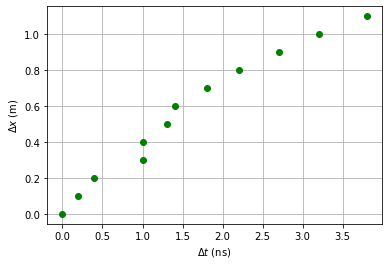

In [3]:
plt.plot(c_data['delta t'], c_data['delta x'], 'og',label='Data')
plt.xlabel('$\Delta t$ (ns)')
plt.ylabel('$\Delta x$ (m)')
plt.grid(True)
plt.show()

### Define a linear fit function
We define the function `f_line` to be that of a line `f_line = mx + b`.

In [4]:
def f_line(x, m, b):
    return m*x + b

Define initial guess for the slope and intercept based upon our data graphed above. The $\Delta t$ values used here are in nanoseconds. Therefore, the expected speed of light is

$$3\times 10^8~{\rm m/s} \times\frac{10^{-9}~{\rm s}}{\rm ns} = 0.3~{\rm m/ns}$$ 

The intercept is near zero, but we need to give the `curve_fit` a small non-zero guess.

We run the curve fit and put the output into `fit_params` containing slope and intercept and `fit_cov` containing the covariant matrix of the squared uncertainties. Since we want to include uncertainty, we define an uncertainty column to be added to the dataframe. Then, we include that in the curve fitting as `sigma`. The uncertainties are absolute since they have the same units as the measurement. 

In [5]:
m = 0.3 #m/ns
b = 0.0005

#create an uncertainty column for dx in the dataframe
c_data['dx_unc'] = 0.05

fit_params, fit_cov = curve_fit(f_line, c_data['delta t'], c_data['delta x'], (m,b), sigma=c_data['dx_unc'], absolute_sigma='True')
print(fit_params, fit_cov)

[0.29525817 0.08250791] [[ 0.00015806 -0.00025026]
 [-0.00025026  0.00060458]]


### Plot the fit
The fit can now be added to the graph to see how well the line models our data. We first define arrays to store the fit $x$ and $y$, which are $\Delta x$ and $\Delta t$, respectively. We also want to include our error estimates on the graph. We will use `matplotlib.pyplot.errorbar` to do this. It is slightly different from the `plot` function we have used before. The markers are colored using `c=`; the markers are chosen using `marker=`; the marker face color is chosen using `mfc=`; the marker edge color is chosen using `mec=`; and the connecting line should be set with `ls='none'`.

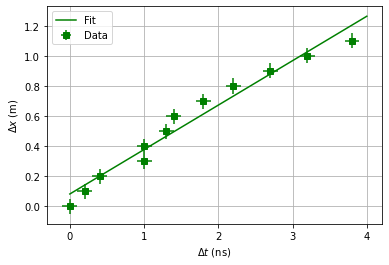

In [6]:
dt_fit = np.linspace(0, 4, 50)
dx_fit = fit_params[0]*dt_fit + fit_params[1]

plt.errorbar(c_data['delta t'], c_data['delta x'], xerr=0.1, yerr=c_data['dx_unc'], c='green', marker='s', mfc='green', mec='green', ls='none', label='Data')
plt.plot(dt_fit, dx_fit, '-g',label='Fit')
plt.xlabel('$\Delta t$ (ns)')
plt.ylabel('$\Delta x$ (m)')
plt.legend(loc=0)
plt.grid(True)
plt.show()

## Conclusions
A pulsed laser has been used to measure the speed of light. Nanosecond long laser pulses separated with enough time (0.05 seconds) enabled measurement of short time delays between light pulses arriving at two different detectors. The speed of light was calculated to be

$$c=2.952\pm 0.012\times 10^8~{\rm m/s}$$

While our (68% range) uncertainty does not include the known value of $2.998\times 10^8~{\rm m/s}$, we are within 2\% of the known theoretical value. One can see the data flucutates above and below the best fit line such that the fit line does not pass through data points or the error bars. Therefore, there is some unaccounted for error in our measurements. The last two data points may be pulling the slope lower than the theoretical value. Remeasuring these data points may improve the results. Other possible improvements to the measurement accuracy and precision could be made with higher precision length measurements (or longer separation distances), shorter laser pulse duration, or faster detectors.